In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv("/content/Uber_Rides_Synthetic.csv")
dataset.head()


,Ride_ID,Timestamp,Pickup_Location,Dropoff_Location,Distance_km,Fare,Ride_Type,Passenger_Count,Payment_Method
0,a18e67f4-1988-4364-b968-88cf037cfda4,2025-04-02 10:05:53,South Antonio,New Shelby,18.82,89.99,UberBlack,3,Cash
1,6fa2a300-3a30-4438-98d9-a7d4ae3c6f13,2025-03-15 07:54:31,North Jared,North Alexandra,23.21,58.17,UberXL,1,PayPal
2,05b458f0-8432-4165-9162-fd07235b205c,2025-01-27 09:39:34,North David,Mccallport,2.54,75.46,UberComfort,4,Cash
3,a64c6505-a2d6-46e9-b21d-c2dfdbfc9dcf,2025-01-01 14:18:32,Stephaniemouth,Port Johntown,7.17,87.12,UberX,4,PayPal
4,84ca0aad-c9bb-4696-a82d-73fff98a89bc,2025-03-26 10:21:11,West Dawnton,West Kristybury,18.89,30.37,UberBlack,4,Credit Card


In [3]:
dataset.shape


(500, 9)

In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ride_ID           500 non-null    object 
 1   Timestamp         500 non-null    object 
 2   Pickup_Location   500 non-null    object 
 3   Dropoff_Location  500 non-null    object 
 4   Distance_km       500 non-null    float64
 5   Fare              500 non-null    float64
 6   Ride_Type         500 non-null    object 
 7   Passenger_Count   500 non-null    int64  
 8   Payment_Method    500 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 35.3+ KB


In [7]:
print(dataset.columns)


Index(['Ride_ID', 'Timestamp', 'Pickup_Location', 'Dropoff_Location',
       'Distance_km', 'Fare', 'Ride_Type', 'Passenger_Count',
       'Payment_Method'],
      dtype='object')


In [8]:
dataset['Ride_Type'].fillna("Unknown", inplace=True)


<ipython-input-8-144be0378ca4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Ride_Type'].fillna("Unknown", inplace=True)


In [9]:
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'], errors='coerce')


In [10]:
dataset['date'] = dataset['Timestamp'].dt.date
dataset['time'] = dataset['Timestamp'].dt.hour


In [11]:
dataset['day-night'] = pd.cut(dataset['time'],
                              bins=[0, 10, 15, 19, 24],
                              labels=['Morning', 'Afternoon', 'Evening', 'Night'],
                              right=False)


In [12]:
def categorize_time(hour):
    if 0 <= hour < 10:
        return 'Morning'
    elif 10 <= hour < 15:
        return 'Afternoon'
    elif 15 <= hour < 19:
        return 'Evening'
    else:
        return 'Night'

dataset['day-night'] = dataset['time'].apply(categorize_time)


In [13]:
dataset.dropna(inplace=True)


In [14]:
dataset.drop_duplicates(inplace=True)


In [15]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values

{'Ride_ID': 500,
 'Pickup_Location': 490,
 'Dropoff_Location': 487,
 'Ride_Type': 5,
 'Payment_Method': 3,
 'date': 93,
 'day-night': 4}

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

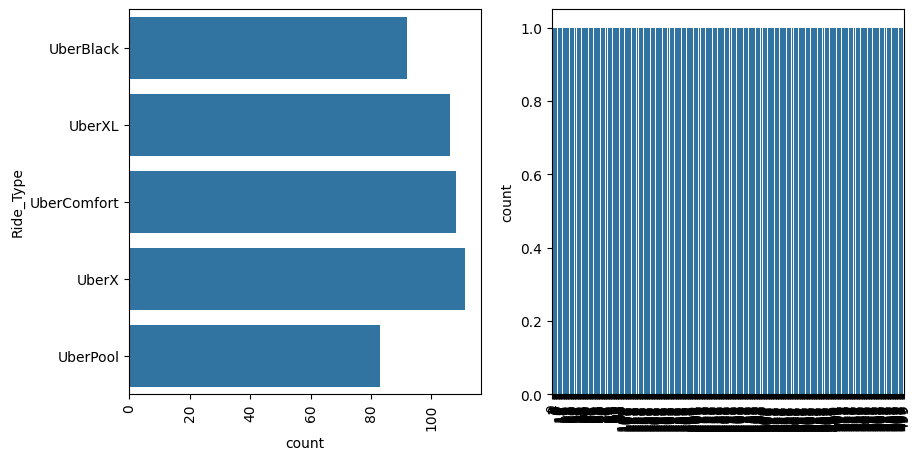

In [16]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(dataset['Ride_Type'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(dataset['Distance_km'])
plt.xticks(rotation=90)


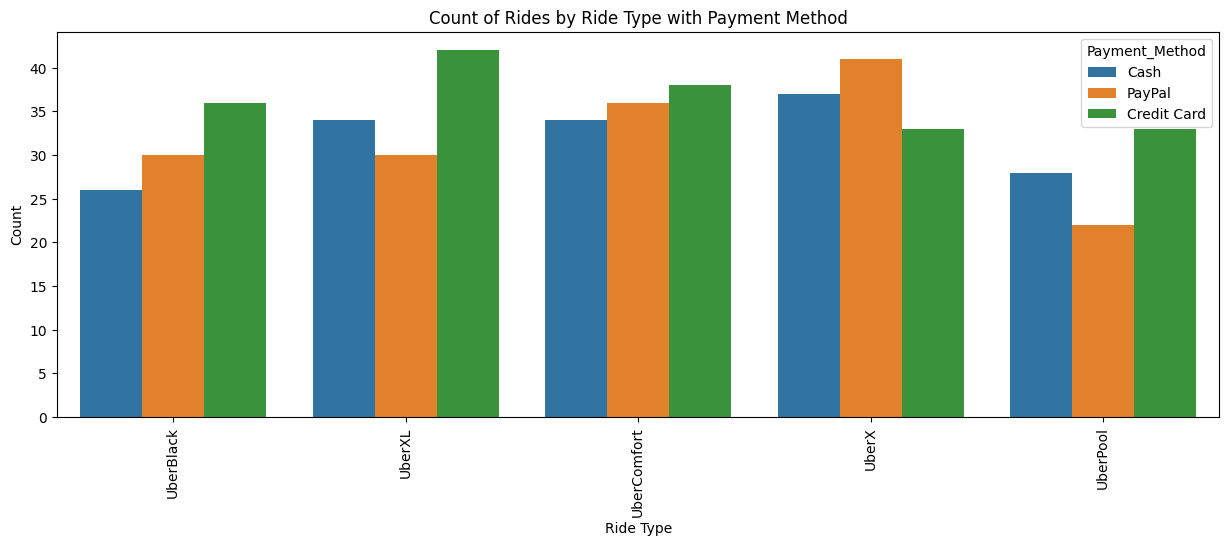

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='Ride_Type', hue='Payment_Method')
plt.xticks(rotation=90)
plt.xlabel("Ride Type")
plt.ylabel("Count")
plt.title("Count of Rides by Ride Type with Payment Method")
plt.show()


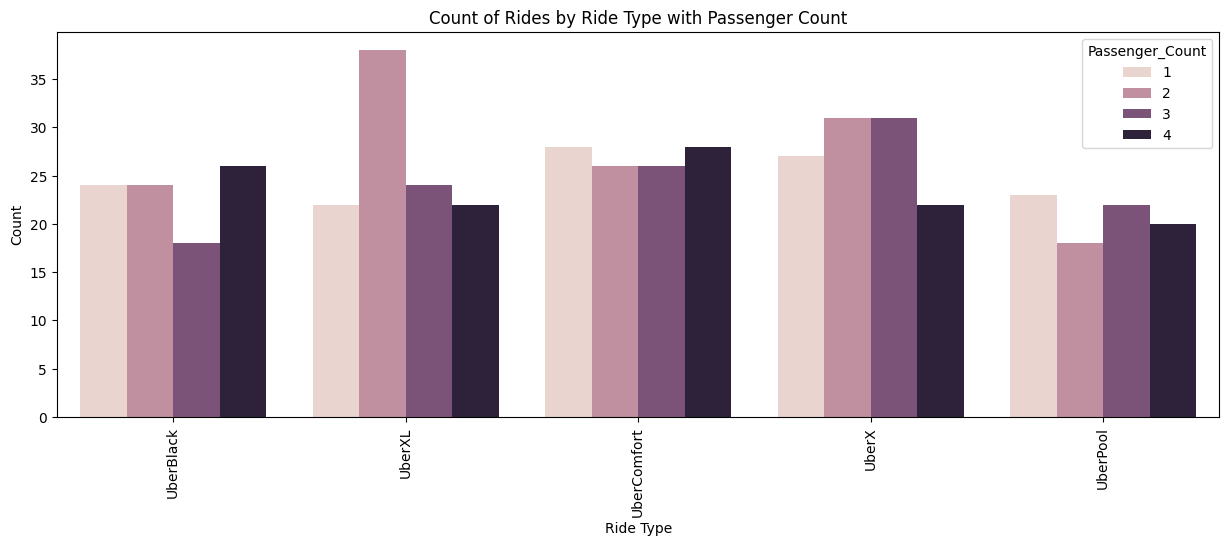

In [19]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='Ride_Type', hue='Passenger_Count')
plt.xticks(rotation=90)
plt.xlabel("Ride Type")
plt.ylabel("Count")
plt.title("Count of Rides by Ride Type with Passenger Count")
plt.show()


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Timestamp to datetime format
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'], errors='coerce')

# Extract hour from Timestamp
dataset['hour'] = dataset['Timestamp'].dt.hour

# Categorize into day periods
bins = [0, 10, 15, 19, 24]
labels = ['Morning', 'Afternoon', 'Evening', 'Night']
dataset['day-night'] = pd.cut(dataset['hour'], bins=bins, labels=labels, right=False)

# Drop rows where 'day-night' could not be assigned
dataset.dropna(subset=['day-night'], inplace=True)


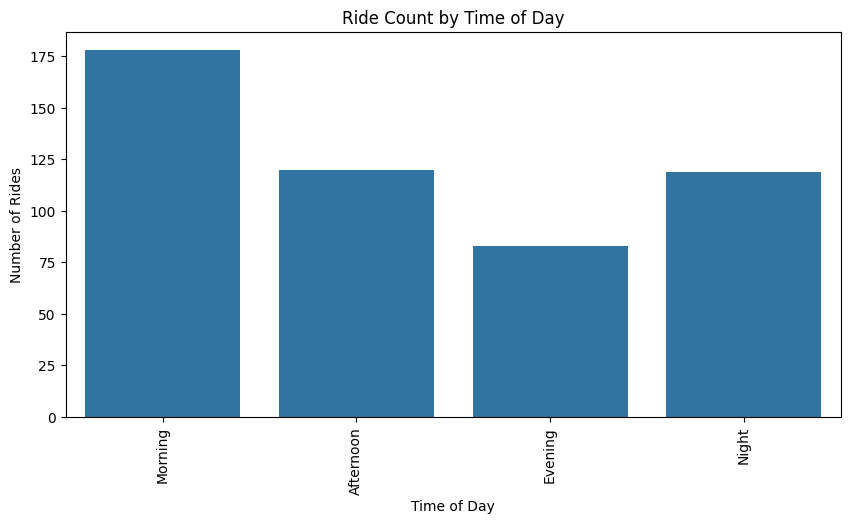

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='day-night')
plt.xticks(rotation=90)
plt.xlabel("Time of Day")
plt.ylabel("Number of Rides")
plt.title("Ride Count by Time of Day")
plt.show()


In [23]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Define categorical columns to encode
object_cols = ['Ride_Type', 'Payment_Method']

# Initialize OneHotEncoder (fixed argument)
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply one-hot encoding
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))

# Set index and column names
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()

# Drop original categorical columns
df_final = dataset.drop(object_cols, axis=1)

# Concatenate dataset with encoded columns
dataset = pd.concat([df_final, OH_cols], axis=1)

# Display transformed dataset
print(dataset.head())


                                Ride_ID           Timestamp Pickup_Location  \
0  a18e67f4-1988-4364-b968-88cf037cfda4 2025-04-02 10:05:53   South Antonio   
1  6fa2a300-3a30-4438-98d9-a7d4ae3c6f13 2025-03-15 07:54:31     North Jared   
2  05b458f0-8432-4165-9162-fd07235b205c 2025-01-27 09:39:34     North David   
3  a64c6505-a2d6-46e9-b21d-c2dfdbfc9dcf 2025-01-01 14:18:32  Stephaniemouth   
4  84ca0aad-c9bb-4696-a82d-73fff98a89bc 2025-03-26 10:21:11    West Dawnton   

  Dropoff_Location  Distance_km   Fare  Passenger_Count        date  time  \
0       New Shelby        18.82  89.99                3  2025-04-02    10   
1  North Alexandra        23.21  58.17                1  2025-03-15     7   
2       Mccallport         2.54  75.46                4  2025-01-27     9   
3    Port Johntown         7.17  87.12                4  2025-01-01    14   
4  West Kristybury        18.89  30.37                4  2025-03-26    10   

   day-night  hour  Ride_Type_UberBlack  Ride_Type_UberComfort

In [25]:
# Select only numerical columns
numeric_dataset = dataset.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_dataset.corr()

# Display correlation matrix
print(correlation_matrix)


                            Distance_km      Fare  Passenger_Count      time  \
Distance_km                    1.000000  0.004040        -0.016053 -0.031548   
Fare                           0.004040  1.000000         0.057676 -0.040149   
Passenger_Count               -0.016053  0.057676         1.000000  0.037005   
time                          -0.031548 -0.040149         0.037005  1.000000   
hour                          -0.031548 -0.040149         0.037005  1.000000   
Ride_Type_UberBlack            0.010890  0.010096         0.014636 -0.083891   
Ride_Type_UberComfort         -0.022466  0.013684         0.016178 -0.015484   
Ride_Type_UberPool             0.030317 -0.027813         0.001569  0.025259   
Ride_Type_UberX                0.007121 -0.001809        -0.016255  0.028185   
Ride_Type_UberXL              -0.022545  0.003810        -0.015064  0.043469   
Payment_Method_Cash           -0.014143  0.000234        -0.031512 -0.056818   
Payment_Method_Credit Card     0.021348 

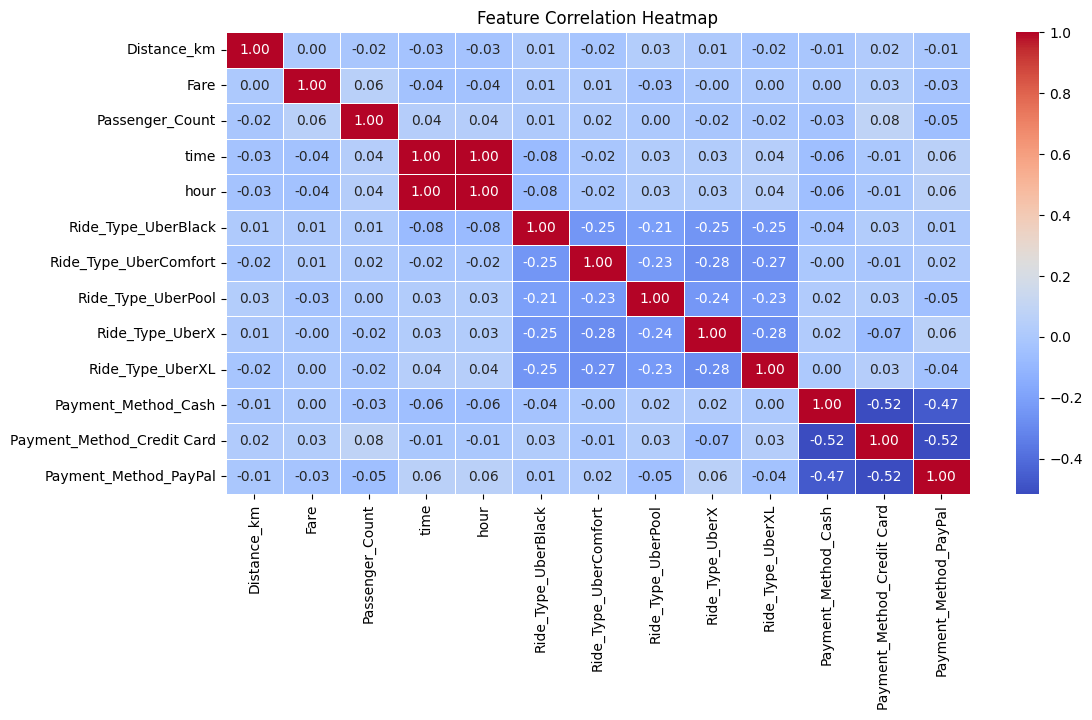

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


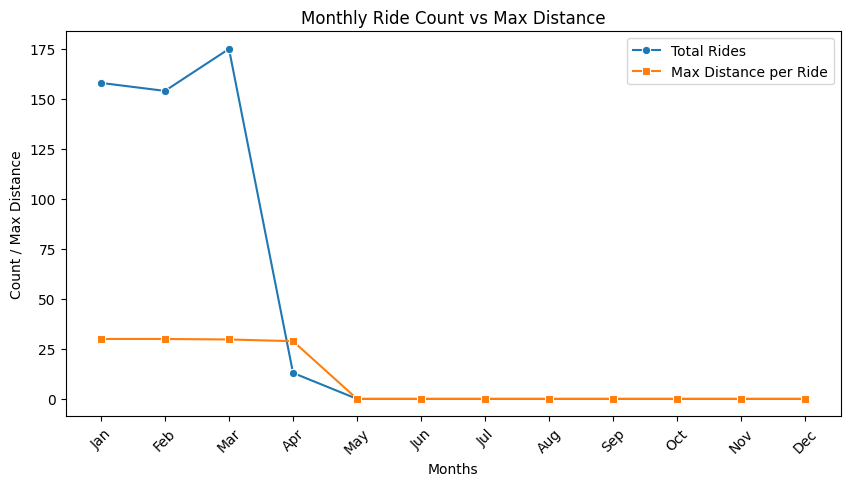

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Timestamp' to datetime format
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'], errors='coerce')

# Extract month from Timestamp
dataset['MONTH'] = dataset['Timestamp'].dt.month

# Map month numbers to names
month_label = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
               5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
               9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

dataset['MONTH'] = dataset['MONTH'].map(month_label)

# Get month-wise ride count
mon = dataset['MONTH'].value_counts(sort=False)

# Get max ride distance per month
df = pd.DataFrame({"MONTHS": mon.index,
                   "TOTAL RIDES": mon.values,
                   "MAX DISTANCE": dataset.groupby('MONTH', sort=False)['Distance_km'].max()})

# Ensure all months exist in the DataFrame
all_months = list(month_label.values())
df = df.set_index("MONTHS").reindex(all_months, fill_value=0).reset_index()

# Plot
plt.figure(figsize=(10, 5))
p = sns.lineplot(data=df, x="MONTHS", y="TOTAL RIDES", marker='o', label="Total Rides")
sns.lineplot(data=df, x="MONTHS", y="MAX DISTANCE", marker='s', label="Max Distance per Ride")

# Labels and title
p.set(xlabel="Months", ylabel="Count / Max Distance")
plt.title("Monthly Ride Count vs Max Distance")
plt.legend()
plt.xticks(rotation=45)
plt.show()


<ipython-input-30-ae5e8cf05154>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette="viridis")


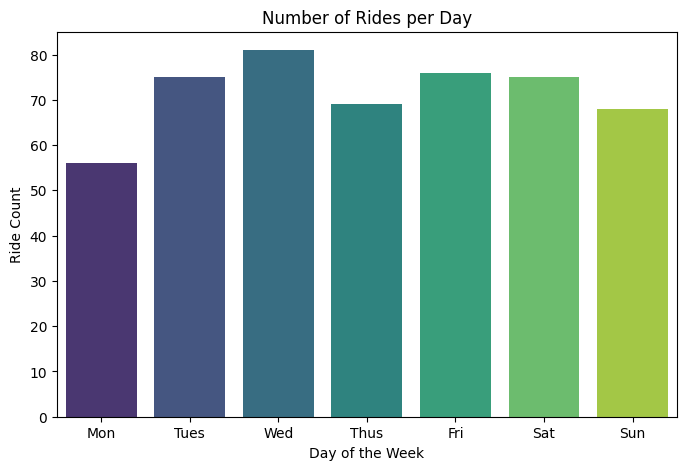

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Timestamp' to datetime format
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'], errors='coerce')

# Extract day of the week (0 = Monday, 6 = Sunday)
dataset['DAY'] = dataset['Timestamp'].dt.weekday

# Map day numbers to day names
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

# Get the count of rides per day
day_counts = dataset['DAY'].value_counts()

# Ensure all days are present in the correct order
all_days = ['Mon', 'Tues', 'Wed', 'Thus', 'Fri', 'Sat', 'Sun']
day_counts = day_counts.reindex(all_days, fill_value=0)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="viridis")

# Labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Ride Count')
plt.title('Number of Rides per Day')
plt.show()


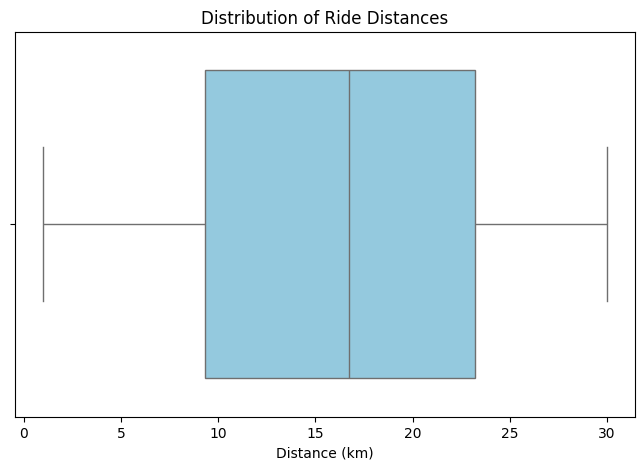

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Distance_km column
plt.figure(figsize=(8, 5))
sns.boxplot(x=dataset['Distance_km'], color="skyblue")

# Labels and title
plt.xlabel('Distance (km)')
plt.title('Distribution of Ride Distances')
plt.show()


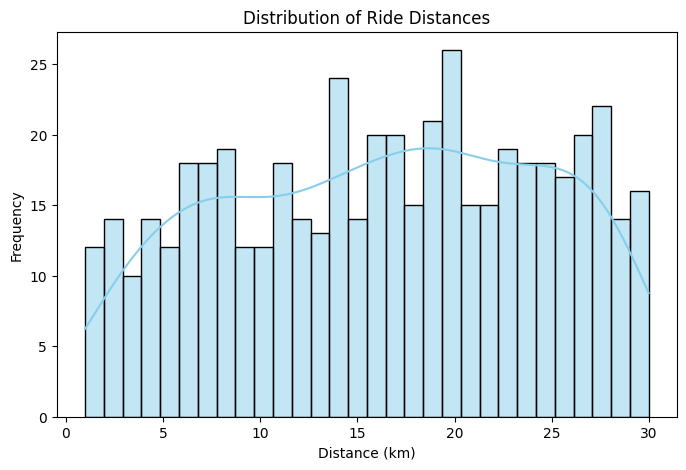

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for ride distances (excluding extreme values)
plt.figure(figsize=(8, 5))
sns.histplot(dataset[dataset['Distance_km'] < 40]['Distance_km'], bins=30, kde=True, color="skyblue")

# Labels and title
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Ride Distances')
plt.show()
